# Model produkcji energii elektrycznej na farmie fotowoltaicznej - zaliczenie laboratorium
## Krzysztof Romański

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Celem zadanie jest opracowanie modelu produkcjji elektrycznej na farmie fotowoltaicznej. Do zadania wykorzystałem dane pozyskane ze strony https://pvoutput.org/ na podstawie farmy ulokowanej w Brisbane Australia (https://pvoutput.org/list.jsp?p=0&id=44011&sid=40202&v=0&o=date&d=desc). Wybrałem tą farme bo miała dobrze opisane warunki pogodowe oraz była położona w lokalizacji dla której dosyć łatwo mogłem znaleźć informacje o temperaturze i wilgotności powietrza. Przeanalizuje wyniki dzienne udostępnione w 2022 roku.

W pliku dane1 znajdują sie dane pobrane ze strony pvoutput. Wyniki w kolumnie Efficiency powstają poprzez podzielenie wartości z kolumny Generated przez stałą wartość (nominalną moc paneli) w tym wypadku 1,6. Także pomijam wykorzystanie tej kolumny. Temperatura nie jest podawana dokładnie i trudno jest ją wykorzystać w tej formie więc pozyskam informacje o niej z innego źródła. Kolumny Exported, Peak Power, Peak Time oraz Comments nie zawierają użytecznych informacji więc je też pomijam.

In [124]:
df1 = pd.read_csv('dane1.csv')
df1=df1.iloc[::-1]
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 364 to 0
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Generated    365 non-null    object
 2   Efficiency   365 non-null    object
 3   Exported     365 non-null    object
 4   Peak Power   365 non-null    object
 5   Peak Time    365 non-null    object
 6   Conditions   365 non-null    object
 7   Temperature  365 non-null    object
 8   Comments     365 non-null    object
dtypes: object(9)
memory usage: 25.8+ KB
None


,Date,Generated,Efficiency,Exported,Peak Power,Peak Time,Conditions,Temperature,Comments
364,2022-01-01,3.462kWh,2.164kWh/kW,-,0.973kW,15:05,Mostly Cloudy,0 to 41C,Updated 18:22 UTC+10:00
363,2022-01-02,6.137kWh,3.836kWh/kW,-,1.590kW,10:05,Partly Cloudy,27 to 46C,Updated 18:22 UTC+10:00
362,2022-01-03,7.949kWh,4.968kWh/kW,-,1.761kW,13:15,Fine,0 to 52C,Updated 18:21 UTC+10:00
361,2022-01-04,6.937kWh,4.336kWh/kW,-,1.505kW,11:45,Fine,0 to 49C,Updated 18:32 UTC+10:00
360,2022-01-05,6.680kWh,4.175kWh/kW,-,1.826kW,12:20,Fine,33 to 51C,Updated 18:05 UTC+10:00


W pliku dane 2 znajdują się dane pobrane ze strony https://www.wunderground.com/history/monthly/au/brisbane/YBBN/date/2022-12, pochodzą one z pobliskiego lotniska oddalonego o około 30 km od paneli słonecznych. Będę korzystał ze średnich wartości temperatury oraz wilgotności powietrza.

In [125]:
df2 = pd.read_csv('dane2.csv')
print(df2.info())
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Avg_Temp  365 non-null    float64
 1   Avg_Hum   365 non-null    float64
 2   Max_Temp  365 non-null    int64  
 3   Min_Temp  365 non-null    int64  
 4   Max_Hum   365 non-null    int64  
 5   Min_Hum   365 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 17.2 KB
None


,Avg_Temp,Avg_Hum,Max_Temp,Min_Temp,Max_Hum,Min_Hum
0,71.7,89.6,75,68,94,78
1,73.3,76.0,81,66,100,54
2,77.6,61.3,86,68,83,48
3,78.9,67.2,88,72,83,55
4,78.1,79.2,84,73,89,70


In [126]:
selected_columns1 = ['Date', 'Generated', 'Conditions']
selected_columns2 = ['Avg_Temp', 'Avg_Hum']
df11=df1[selected_columns1].copy()
df21=df2[selected_columns2].copy()

In [127]:
df = pd.concat([df11, df21], axis=1)
df['Generated'] = (df['Generated'].str.slice(stop=-3)).astype(float)

In [128]:
df['Avg_Temp'] = (df['Avg_Temp']-32)*5/9

In [129]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 364 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Generated   365 non-null    float64
 2   Conditions  365 non-null    object 
 3   Avg_Temp    365 non-null    float64
 4   Avg_Hum     365 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB
None


,Date,Generated,Conditions,Avg_Temp,Avg_Hum
364,2022-01-01,3.462,Mostly Cloudy,23.722222,74.8
363,2022-01-02,6.137,Partly Cloudy,22.555556,86.6
362,2022-01-03,7.949,Fine,23.055556,73.6
361,2022-01-04,6.937,Fine,23.277778,69.2
360,2022-01-05,6.680,Fine,22.388889,76.5


In [130]:
df.describe()

,Generated,Avg_Temp,Avg_Hum
count,365.000000,365.000000,365.000000
mean,5.844819,20.108371,74.548493
std,2.108306,3.875996,10.442831
min,0.119000,11.333333,38.700000
25%,4.541000,16.888889,67.800000
50%,6.238000,20.666667,75.200000
75%,7.323000,23.222222,81.500000
max,9.804000,27.666667,96.900000


Widzimy że dane są od razu możliwe do użycia i nie jest potrzebne ich czyszczenie. Przeprowadzę teraz wstępną wizualizacje zależności danych.

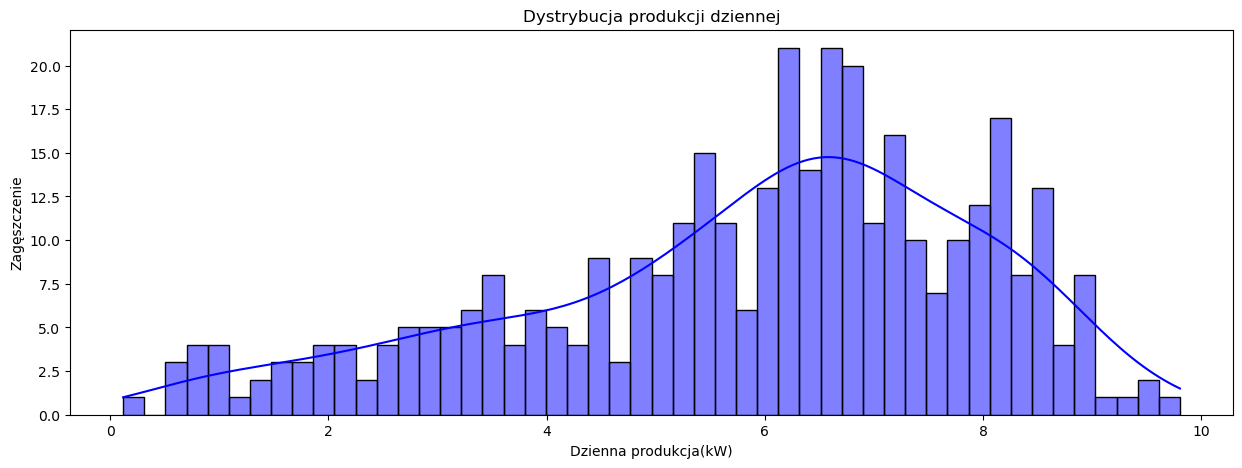

In [131]:
plt.figure(figsize=(15,5))
sns.histplot(df['Generated'], bins=50, color='blue', kde=True)
plt.title('Dystrybucja produkcji dziennej')
plt.xlabel('Dzienna produkcja(kW)')
plt.ylabel('Zagęszczenie')
#plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


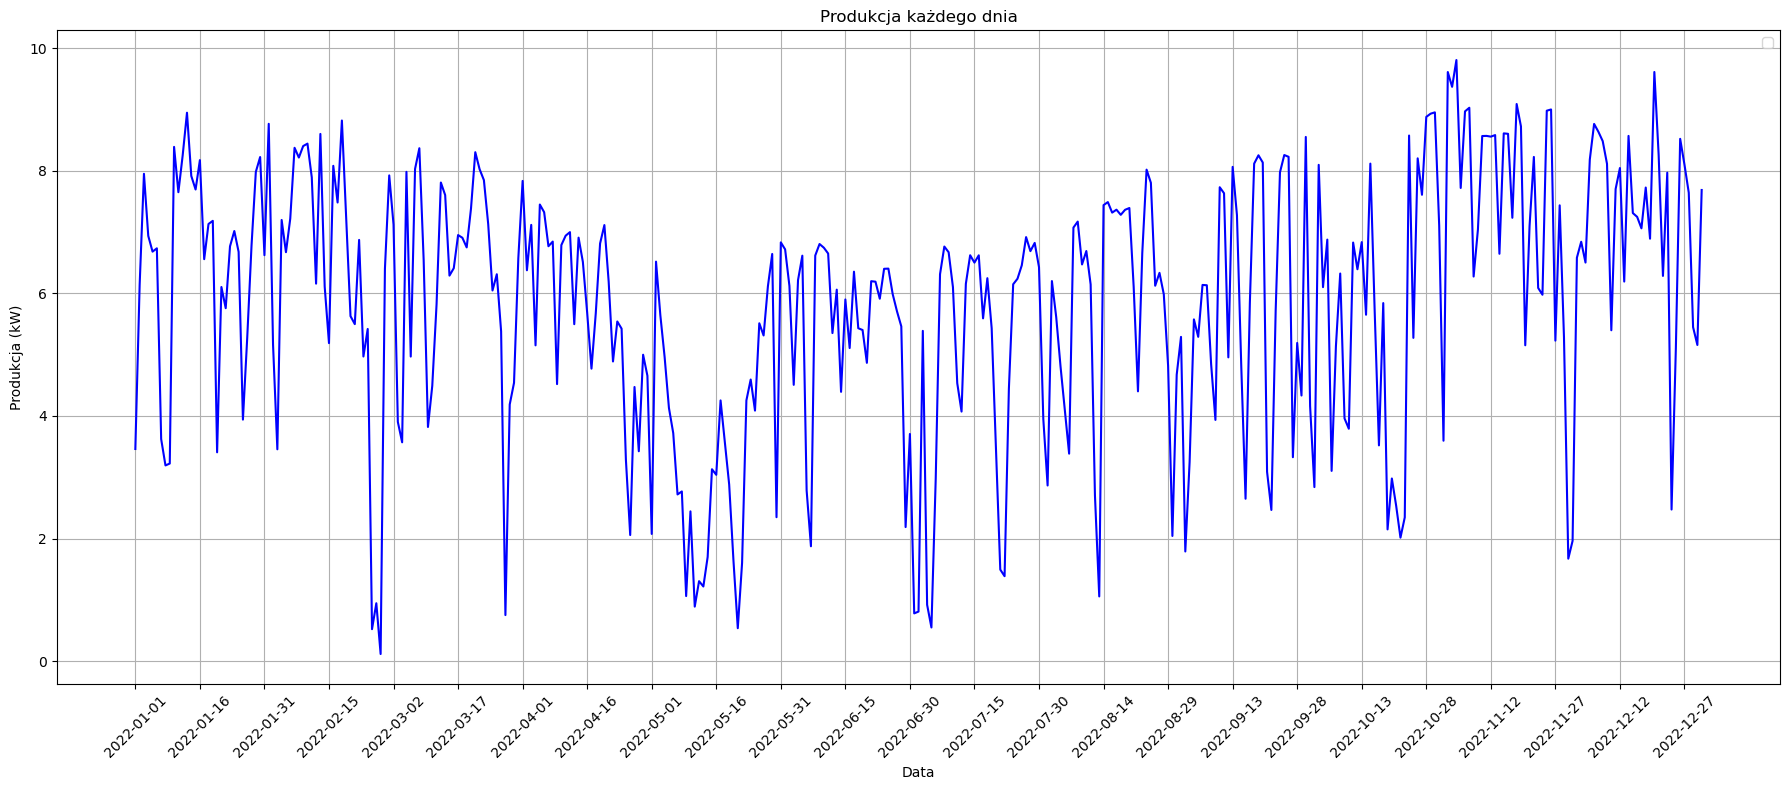

In [132]:
plt.figure(figsize=(18,8))
plt.plot(df['Date'], df['Generated'], color='blue')
plt.title('Produkcja każdego dnia')
xticks = df['Date'][::15]  
plt.xticks(xticks)
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Produkcja (kW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Na histogramie widzimy kształt zbliżony do rozkładu normlanego z przeważjącymi wynikami w wyższej połowie wykresu. Na wykresie produkcji każdego dnia może zauważyć że wartości osiągają mniejsze maksimum w okolicach miesięcy ziomwych co może sugerować że ze wzrostem temperatury rośnie wydajność paneli. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


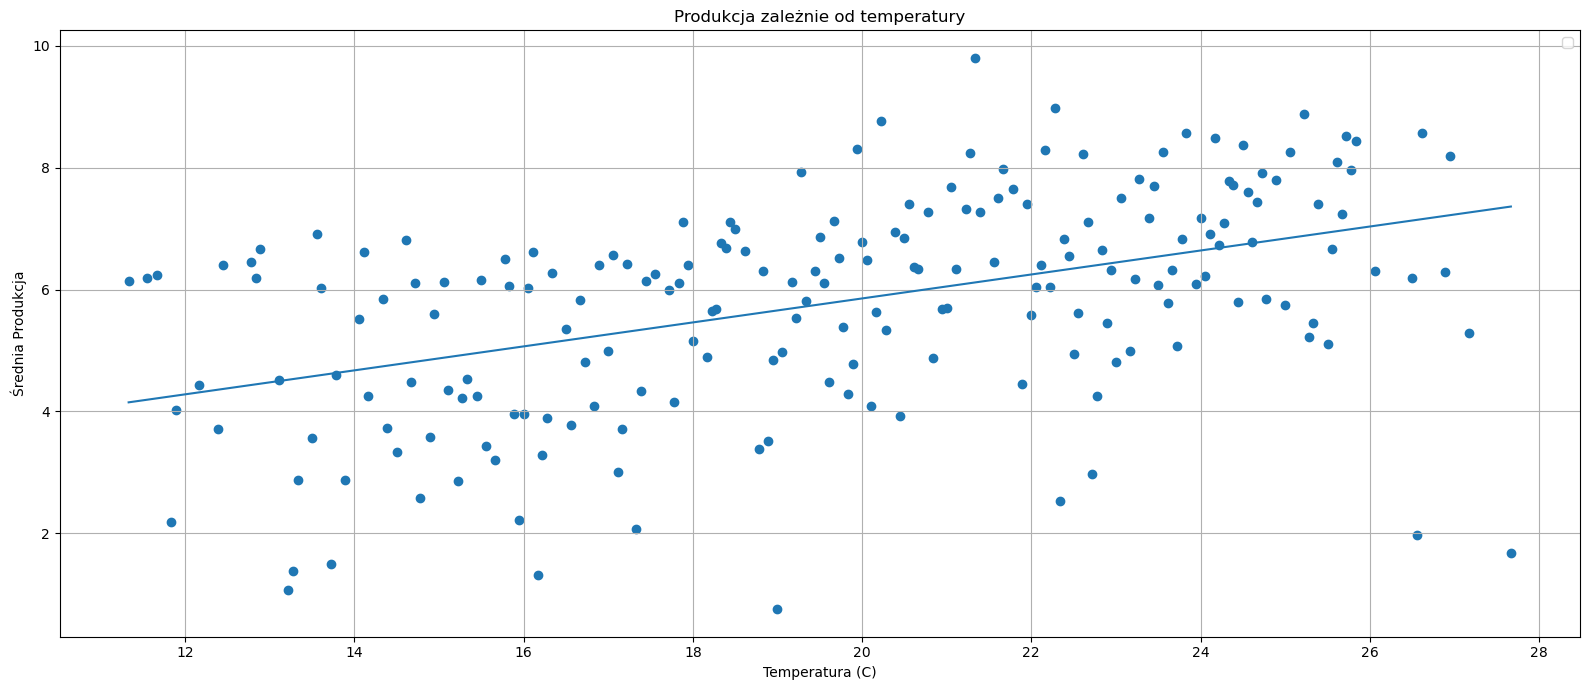

In [150]:
df_avgpower = df.groupby(df['Avg_Temp'])[['Generated']].mean().reset_index()

plt.figure(figsize=(16,7))
plt.scatter(df_avgpower['Avg_Temp'], df_avgpower['Generated'])
z = np.polyfit(df_avgpower['Avg_Temp'], df_avgpower['Generated'], 1)
p = np.poly1d(z)
plt.plot(df_avgpower['Avg_Temp'], p(df_avgpower['Avg_Temp']))
plt.title('Produkcja zależnie od temperatury')
plt.xlabel('Temperatura (C)')
plt.ylabel('Średnia Produkcja')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


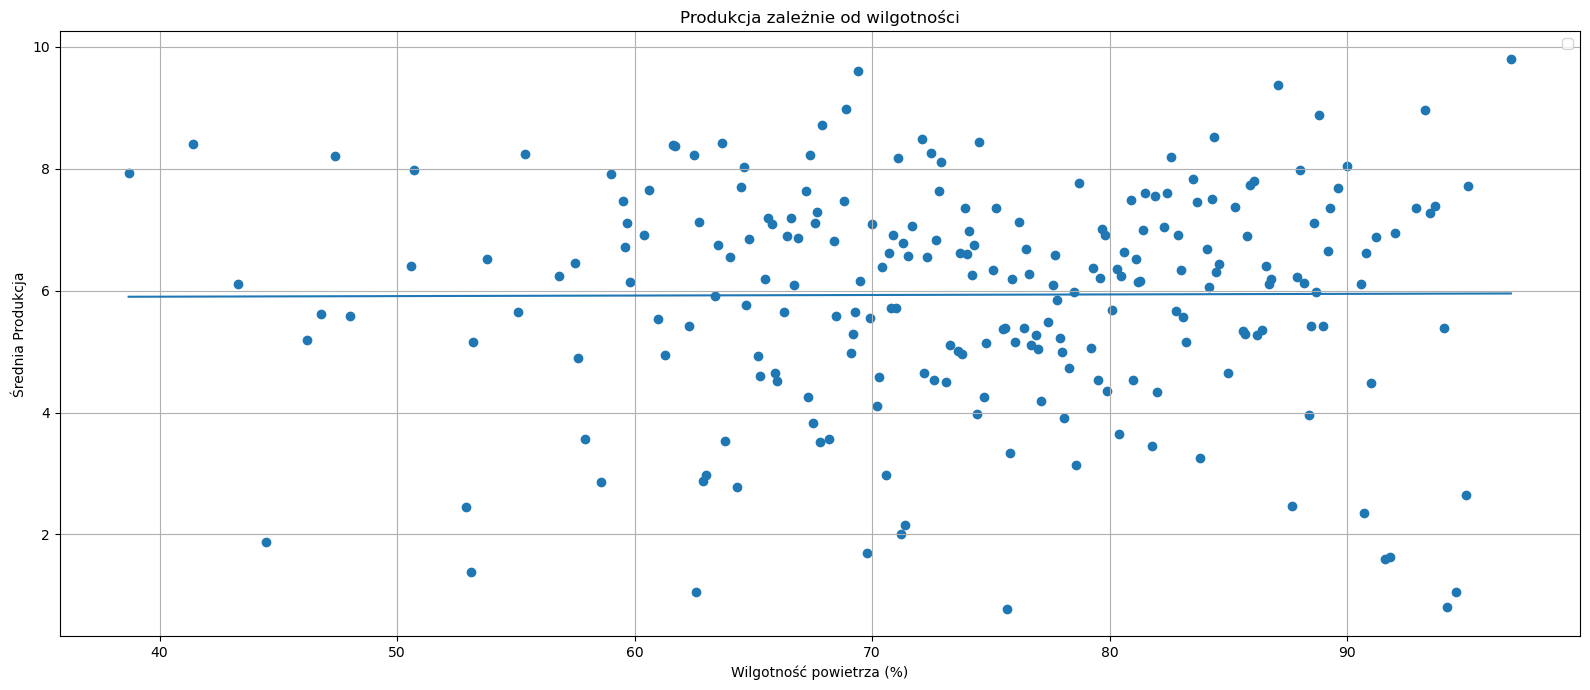

In [145]:
df_avgpower = df.groupby(df['Avg_Hum'])[['Generated']].mean().reset_index()

plt.figure(figsize=(16,7))
plt.scatter(df_avgpower['Avg_Hum'], df_avgpower['Generated'])
z = np.polyfit(df_avgpower['Avg_Hum'], df_avgpower['Generated'], 1)
p = np.poly1d(z)
plt.plot(df_avgpower['Avg_Hum'], p(df_avgpower['Avg_Hum']))
plt.title('Produkcja zależnie od wilgotności')
plt.xlabel('Wilgotność powietrza (%)')
plt.ylabel('Średnia Produkcja')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Zamieniam nazwy stanów nieba na odpowiednie wartości liczbowe w kolejnośći podanej na stronie pvoutput.org, dzięki czemu łątwiej będzie ustalic korelacje tej danej z wydajnością paneli (wyższa wartość = czystrzejsze niebo).

In [134]:
df['Conditions'].unique()

array(['Mostly Cloudy', 'Partly Cloudy', 'Fine', 'Showers', 'Cloudy'],
      dtype=object)

In [135]:
label_mapping = {'Showers': 0, 'Cloudy': 1, 'Mostly Cloudy': 2, 'Partly Cloudy': 3, 'Fine': 4}
df['Conditions'] = df['Conditions'].map(label_mapping)
df.head()

,Date,Generated,Conditions,Avg_Temp,Avg_Hum
364,2022-01-01,3.462,2,23.722222,74.8
363,2022-01-02,6.137,3,22.555556,86.6
362,2022-01-03,7.949,4,23.055556,73.6
361,2022-01-04,6.937,4,23.277778,69.2
360,2022-01-05,6.680,4,22.388889,76.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


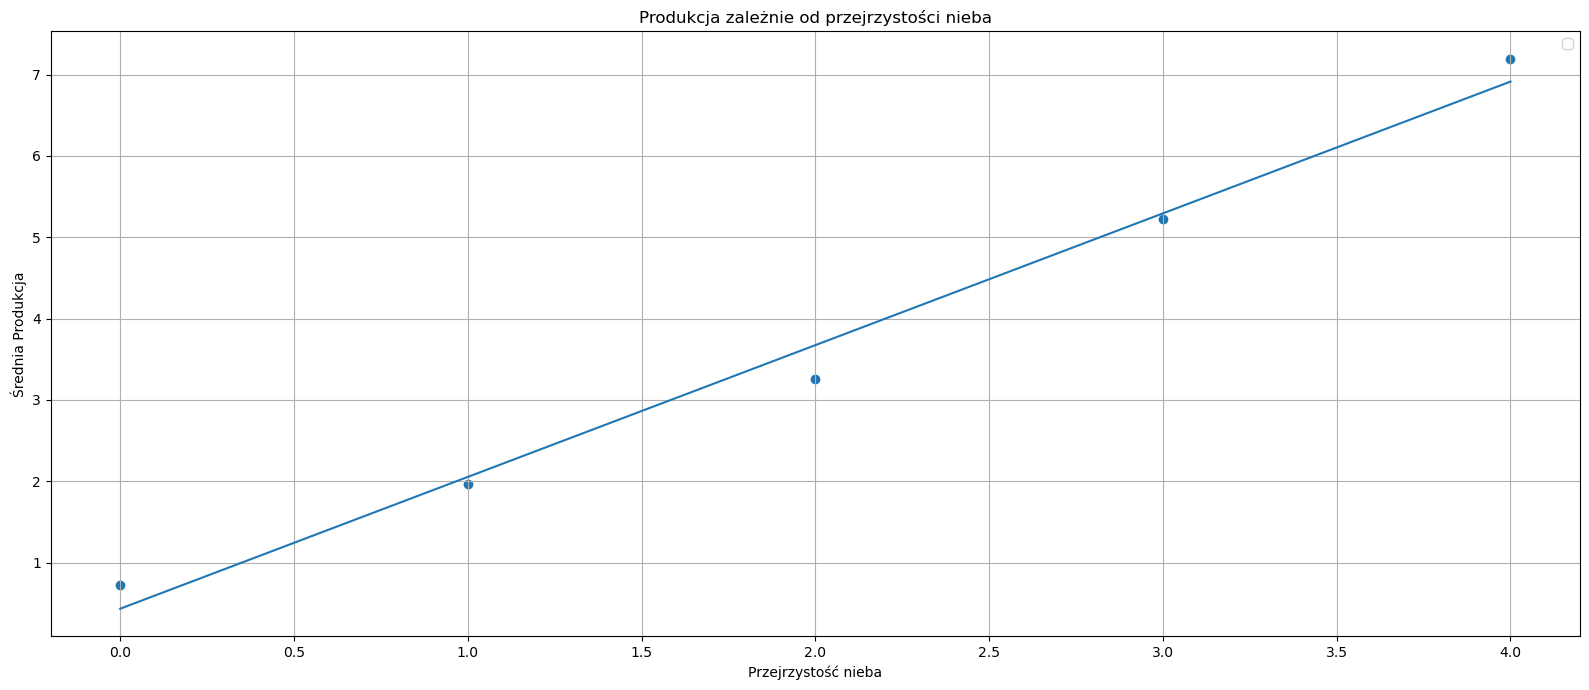

In [148]:
df_avgpower = df.groupby(df['Conditions'])[['Generated']].mean().reset_index()

plt.figure(figsize=(16,7))
plt.scatter(df_avgpower['Conditions'], df_avgpower['Generated'])
z = np.polyfit(df_avgpower['Conditions'], df_avgpower['Generated'], 1)
p = np.poly1d(z)
plt.plot(df_avgpower['Conditions'], p(df_avgpower['Conditions']))
plt.title('Produkcja zależnie od przejrzystości nieba')
plt.xlabel('Przejrzystość nieba')
plt.ylabel('Średnia Produkcja')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Widzimy bardzo dobre dopasowanie przejrzystości nieba do produkcji paneli, oraz lekką dodatnią korelacje temperatury z efektywnością. Wpływ wilgotności powietrza jest w tym wypadku pomijalny.

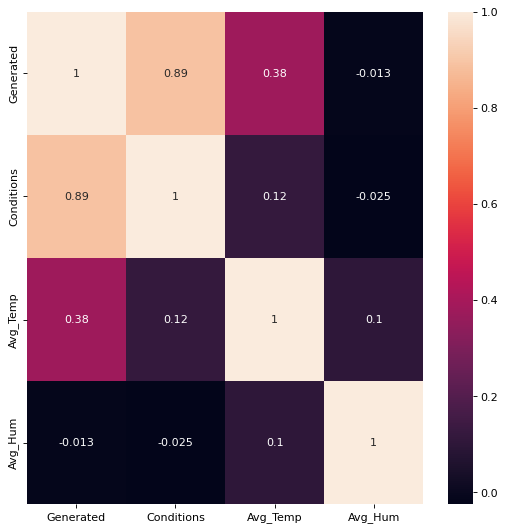

In [136]:
columns=['Generated', 'Conditions','Avg_Temp', 'Avg_Hum']
coorelation = df[columns].corr()
plt.figure(dpi = 80, figsize=(8, 8))
sns.heatmap(coorelation, annot=coorelation)
plt.show()

Widzimy że najistotniejszym parametrem jest przejrzystość nieba, lecz także temperatura ma stosunkowo wysoki wpływ na produkcję energi. Potwierdza się także praktycznie zerowy wpływ wilgotności powietrza na wyniki paneli słonecznych.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 364 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Generated   365 non-null    float64
 2   Conditions  365 non-null    int64  
 3   Avg_Temp    365 non-null    float64
 4   Avg_Hum     365 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


Poszukam teraz najlepiej dopasowanych wartości współczynników przy pomocy dwóch metod - RidgeCV oraz ElasticNetCV.


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
import math


X = df.iloc[:,2:]
y = df[['Generated']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RidgeCV()
model.fit(X_train, y_train)
print(model.coef_)
y_pred_train = model.predict(X_train)
e_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
e_test = math.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'e_train = {e_train}\ne_test = {e_test}')

[[ 1.6839211   0.15587477 -0.00458683]]
e_train = 0.7734380411488609
e_test = 0.7498285165855517


In [139]:
model = ElasticNetCV()
model.fit(X_train, y_train.values.ravel())
print(f'alpha = {model.alpha_}')
print(model.intercept_)
print(model.coef_)
y_pred_train = model.predict(X_train)
e_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
e_test = math.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'e_train = {e_train}\ne_test = {e_test}')

chosen_features = []
for idx, coef in enumerate(model.coef_):
    if coef != 0:
        chosen_features.append(X_train.columns[idx])
    
print(chosen_features)


alpha = 0.00734301906147366
-2.4131334906233146
[ 1.68029752  0.15576675 -0.00455543]
e_train = 0.7734749951923029
e_test = 0.7499910658187131
['Conditions', 'Avg_Temp', 'Avg_Hum']


## Wnioski
+ Otrzymane współczynniki: 1.68 dla przejrzystości powietrza, 0.16 dla średniej temperatury oraz -0.005 dla średniej wilgotności
+ Obydwie metody wykazały podobne wyniki oraz błędy. 
+ Najważniejszym czynnikiem wpływającym na produkcje energii jest przejrzystość powietrza co wydaje się być oczywiste
+ Dodatnia korelacja temperatury z produkcją sugeruje że przy wyższej temperaturze panele powinny produkować więcej energii. Lecz badania tego nie potwierdzają, nawet zależnie od modelu panele powinny działać lepiej w niższych temperaturach. Dodatnia korelacja w tym wypadku może być spowodowana pośrednim wpływem dodatniej temperatury na warunki pogodowe. Możliwe jest także że w wyższej średniej temperaturze, panele są przez krótszy czas obsypane śniegiem/zalane deszczem co może pozytywnie wpływać na produkcję energii.
+ Wilgotność powietrza ma marginalny wpływ na działanie paneli co także jest potwierdzane przez badania, które mówią że wpływ tego czynnika jest bardzo niski.